The function `sbm` takes the following arguments:
- `oracle`: first-order oracle function, which takes in `x`, the query position, and returns an unbiased estimate of the derivative at `x`;
- `start.left`, `start.right`: left and right endpoints of the initial interval for searching;
- `budget`: budget in terms of number of queries that can be made;
- `end.epoch`: number of epochs to go through, if `budget` is not specified;
- `alpha`: significance level of the hypothesis test for deciding the sign of the derivative, equivalent to the $C$ in the stopping rule;
- `pval.plot`: logical, whether to display plots of the trajectories of p values within each epoch;
- `trace`: logical, whether to display trace of each epoch.

The algorithm basically keeps querying the 1/4, 1/2, and 3/4 points of the current interval, and proceed to the next epoch if either one of the following test gives significant result:
- the sign of the derivative at the 1/2 point is non-zero;
- the sign of the derivative at the 1/4 point is negative, and the sign of the derivative at the 3/4 point is positive.
If the first one becomes significant, either the left half or the right half of the interval is chosen depending on the inferred sign of the derivative. If the second one becomes significant first, we proceed with the middle half of the interval, i.e., the 1/4 point to the 3/4 point.

Let's now test the algorithm on the class of function $|x-x^*|^\kappa$. The oracle returns the true derivative plus a Normal noise with standard deviation 0.1. We choose $x^*$ to be the golden ratio, 0.618..., and start the algorithm with interval (0,1). We set the significance level to be 0.01 (ideally, it should decreases as we proceed; let's just keep it simple here). The risk is calculated as $f(\hat x)-f(x^*)$, and estimated by averaging over 1,000 simulations. 
The following plots show results for 8 different values of $\kappa$. The solid black lines are risk vs budget on a log-log scale; the dashed gray lines indicate the "optimal" convergence rate, with slopes calculated in the title line. Though not very accurate, the algorithm does give faster rate for functions with more curvature.

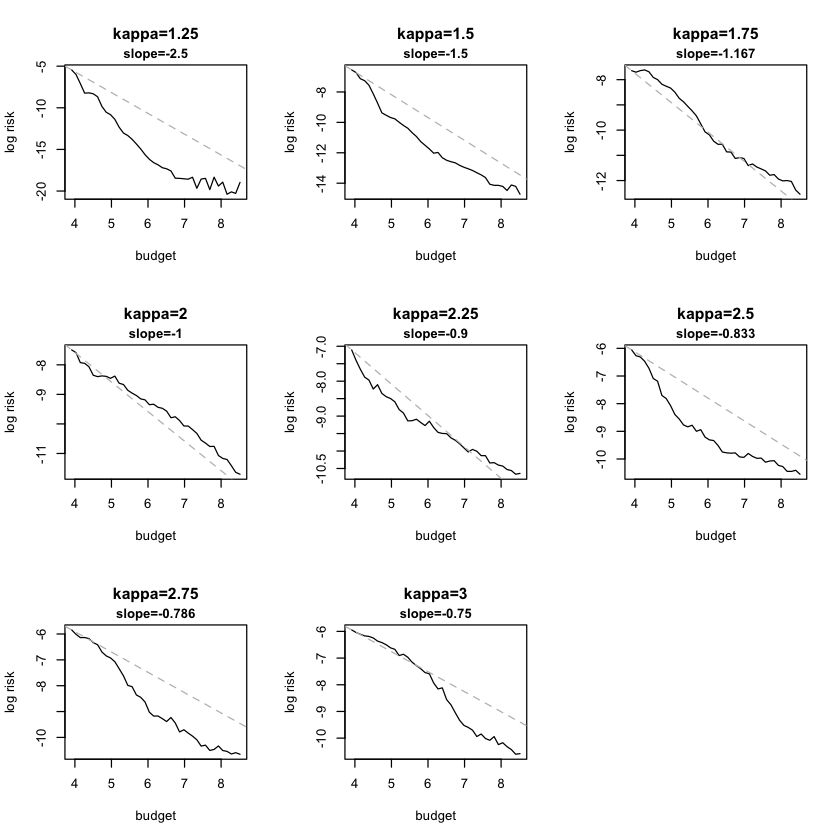

In [1]:
load("xs")
budgets = exp(seq(log(50),log(5000),length.out=40))
kappas = seq(1.25,3,0.25)
x0 = (sqrt(5)-1)/2
par(mfrow=c(3,3))
for (kappa in kappas) {
  risk = colMeans(abs(xs[[paste0("kappa_",kappa)]]-x0))
  plot(log(budgets),kappa*log(risk),type="l",ylab="log risk",xlab="budget",main=paste0("kappa=",kappa))
  slope = -kappa/(2*(kappa-1))
  abline(a=kappa*log(risk[1])-slope*log(budgets[1]),b=slope,col="gray",lty=2)
  title(main=paste0("slope=",round(-kappa/(2*(kappa-1)),3)),line=0.5,cex.main=1)
}